In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터셋 경로 설정
train_dir = '/content/drive/MyDrive/m.s_train'
validation_dir = '/content/drive/MyDrive/m.s_val'

# 데이터 증강
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

Found 409 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [11]:
# 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    #validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 0.5495 - loss: 0.7090
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.5181 - loss: 0.6917
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7000 - loss: 0.6620
Epoch 4/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


 8/10 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.5420 - loss: 0.6945 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (109542160 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.5470 - loss: 0.6931
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.6248 - loss: 0.6740
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6000 - loss: 0.6650
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.6284 - loss: 0.6498
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.6141 - loss: 0.6586
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3000 - loss: 0.8245
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.6333 - loss: 0.6270


<Figure size 640x480 with 0 Axes>

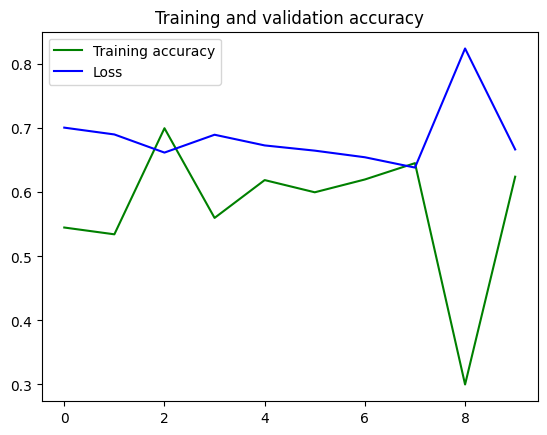

<Figure size 640x480 with 0 Axes>

In [20]:
# 모델평가
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
